In [ ]:
#pip install pandas
#pip install numpy
#pip install scikit-learn
#pip install nltk

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [2]:
from nltk.stem import WordNetLemmatizer
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pawankumarkc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pawankumarkc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/pawankumarkc/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

In [3]:
df = pd.read_csv('/Users/pawankumarkc/Documents/vscodepython/NLP/train_data/bbc_text_cls.csv')
df.head(10)

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
5,Japan narrowly escapes recession\n\nJapan's ec...,business
6,Jobs growth still slow in the US\n\nThe US cre...,business
7,"India calls for fair trade rules\n\nIndia, whi...",business
8,Ethiopia's crop production up 24%\n\nEthiopia ...,business
9,Court rejects $280bn tobacco case\n\nA US gove...,business


In [4]:
inputs = df['text']
labels = df['labels']

<Axes: >

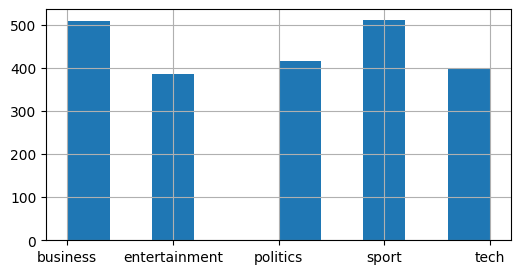

In [5]:
labels.hist(figsize=(6,3))

In [6]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels, random_state=123)

In [7]:
vectorizer  = CountVectorizer()

In [8]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

In [9]:
Xtrain.shape

(1668, 26287)

In [10]:
#What percentage of values are non-zero. np.prod = product
(Xtrain !=0 ).sum()/np.prod(Xtrain.shape)

0.007695239935415004

In [11]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print('Train score: ', model.score(Xtrain, Ytrain))
print('Test score: ', model.score(Xtest, Ytest))

Train score:  0.9922062350119905
Test score:  0.9712746858168761


In [12]:
vectorizer = CountVectorizer(stop_words='english')
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("Train Score: ", model.score(Xtrain, Ytrain))
print("Test Score: ", model.score(Xtest, Ytest)) 

Train Score:  0.9928057553956835
Test Score:  0.9766606822262118


In [13]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.VERB

In [14]:
class LemmaTokenizer:
    def __init__(self) -> None:
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        words_and_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags]

In [15]:
#With Lemmatization
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("Training score: ", model.score(Xtrain, Ytrain))
print("Test score: ", model.score(Xtest, Ytest))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training score:  0.9922062350119905
Test score:  0.9676840215439856


In [16]:
class StemTokenizer:
    def __init__(self) -> None:
        self.porter = PorterStemmer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        return [self.porter.stem(token) for token in tokens]

In [17]:
#With Stemming
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("Training score: ", model.score(Xtrain, Ytrain))
print("Testing score: ", model.score(Xtest, Ytest))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training score:  0.9892086330935251
Testing score:  0.9694793536804309


In [19]:
def simple_tokenizer(doc):
    return doc.split()

In [20]:
#String split based tokenizer
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("Training score: ", model.score(Xtrain, Ytrain))
print("Test score: ", model.score(Xtest, Ytest))

Training score:  0.9952038369304557
Test score:  0.9712746858168761


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
